# About the Data

![](https://images.unsplash.com/photo-1529243856184-fd5465488984?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1069&q=80)

### Origin
AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.

The AG's news topic classification dataset is constructed by Xiang Zhang from the dataset above. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

### Description

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

The file classes.txt contains a list of classes corresponding to each label.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

> ### <span style="color:green">Kindly UpVote the Notebook to support my work and motivate me to create better notebooks</span>.

#### You can connect with me on [LinkedIn](https://www.linkedin.com/in/ishandutta0098)

## Libraries

In [ ]:
!pip install -q --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
import wandb
from wandb.keras import WandbCallback

# Login to wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
# wandb config
WANDB_CONFIG = {
     'competition': 'Detik.com news Classification Dataset',
              '_wandb_kernel': 'neuracort'
    }

dataset, scrapping detik.com

In [ ]:
file_path = "/content/drive/MyDrive/kuliah/nlp/news-classification/detik_news.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.shape

In [ ]:
df.head()

,title,category
0,"Matcha dan Green Tea Tidak Sama, Kenali 5 Perb...",food
1,Ada Udang Pecak hingga Cumi Karang Asam di Pes...,food
2,"Disebut Mirip MPASI, Porsi Makanan Pasien di R...",food
3,"Seleb Korea Ini Tak Doyan Mie Instan, Hanya Ma...",food
4,Duh! Wanita Ini Beli Sandwich Tapi Kena Tagih ...,food


<Axes: ylabel='category'>

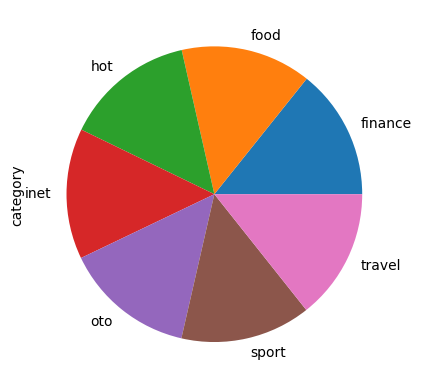

In [ ]:
df['category'].value_counts().sort_index().plot(kind='pie', )

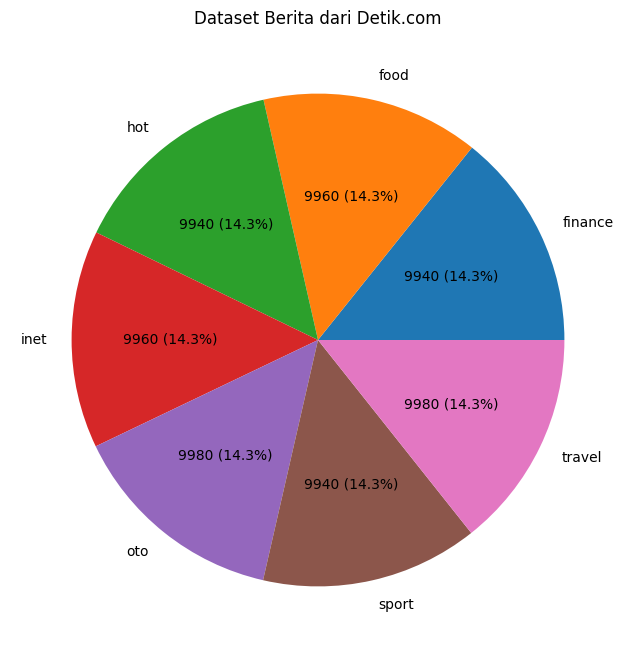

In [ ]:
import matplotlib.pyplot as plt

# Menghitung nilai count dari setiap kategori dan mengurutkannya
category_counts = df['category'].value_counts().sort_index()

# Menyiapkan plot pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(category_counts) / 100, p))

# Menambahkan judul
plt.title('Dataset Berita dari Detik.com')

# Menampilkan jumlah data untuk setiap kategori di dalam pie chart
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

In [ ]:
df.isna().sum()

title       0
category    0
dtype: int64

In [ ]:
import string
import re

def preprocess(text):
  # convert to lower case
  text = text.lower()

  # remove punctuation
  text = text.translate(str.maketrans("","",string.punctuation))

  # remove number
  text = re.sub(r"\d+", "", text)

  # remove whitespace
  text = re.sub('\s+',' ',text.strip())

  # remove single char
  text = re.sub(r"\b[a-zA-Z]\b", "", text)
  return text


In [ ]:
# preprocessing dataset
df['title'] = df['title'].apply(lambda x:preprocess(x))

In [ ]:
df.sample(10)

,title,category
38857,review samsung galaxy hp rp juta banyak fitu...,inet
14305,jalanjalan ke little bangkok tanah abang ada a...,finance
54401,francesco bagnaia kelelahan diserang dani pedrosa,oto
40740,asian le mans series gabung tim baru bagaimana...,sport
42962,ayus dan ronaldo ke besar tunggal taruna putra...,sport
54005,urus skck anies diantar motor sejuta umat hond...,oto
60203,thailand jamin keselamatan turis biaya kecelak...,travel
43587,kejurnas voli gubernur kalteng cup berakhir in...,sport
32585,sman cicalengka juara turnamen esports rrq mab...,inet
5500,kocak penjual gagal atraksi berakhir bayi keja...,food


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df.category)
df['label'] = le.transform(df.category)

X = df['title']
y = df['label']

In [ ]:
df.sample(20)

,title,category,label
3693,aksi ridwan kamil jadi food vlogger promosikan...,food,1
22411,game return to shironagasu island diadaptasi j...,hot,2
12646,menteri jokowi ungkap kondisi istana di tengah...,finance,0
52842,harga jual kembali toyota avanza masih bagus a...,oto,4
8421,duh wanita ini alami getok harga rp ribu untuk...,food,1
44544,motogp prancis bezzecchi juara marquez dan bag...,sport,5
48746,malaysia masters aprifadia pijak perempatfinal,sport,5
35030,daftar hp xiaomi yang akan dapat upgrade ke hy...,inet,3
66795,maskapai terburuk dunia tahun dua teratas dari...,travel,6
15142,sisasisa peninggalan stasiun pengangkut opium ...,finance,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(55760,)

In [ ]:
X_val.shape

(13940,)

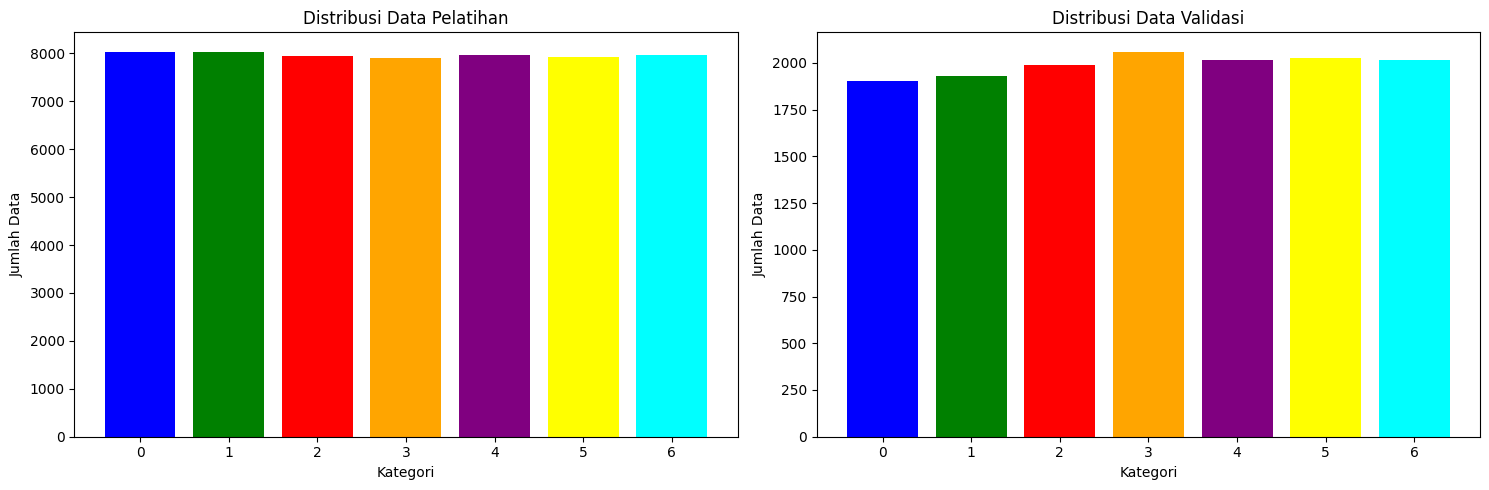

In [ ]:
# Menghitung jumlah data per kategori pada set pelatihan
train_counts = y_train.value_counts().sort_index()

# Menghitung jumlah data per kategori pada set validasi
val_counts = y_val.value_counts().sort_index()

# Plotting data pelatihan
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(train_counts.index, train_counts.values, color = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan'])
plt.title('Distribusi Data Pelatihan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')

# Plotting data validasi
plt.subplot(1, 2, 2)
plt.bar(val_counts.index, val_counts.values, color = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan'])
plt.title('Distribusi Data Validasi')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

In [ ]:
maxlen = X_train.map(lambda x: len(x.split())).max()

In [ ]:
print(maxlen)

In [ ]:
print(y_train)

In [ ]:
print(X_train)

In [ ]:
print(X_train)

## Tokenize and Pad Data

### Tokenization

Tokenization is a common task in Natural Language Processing (NLP). It’s a fundamental step in both traditional NLP methods like Count Vectorizer and Advanced Deep Learning-based architectures like Transformers.

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

For example, consider the sentence: “Never give up”.

The most common way of forming tokens is based on space. Assuming space as a delimiter, the tokenization of the sentence results in 3 tokens – Never-give-up. As each token is a word, it becomes an example of Word tokenization.

Similarly, tokens can be either characters or subwords. For example, let us consider “smarter”:

1. Character tokens: s-m-a-r-t-e-r
2. Subword tokens: smart-er

### Padding
All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary.

In [ ]:
vocab_size = 10000 # arbitrarily chosen
embed_size = 32 # arbitrarily chosen

# Create and Fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# Tokenize data
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad data
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(X_train)

[[   0    0    0 ...  855    4 1970]
 [   0    0    0 ... 2865 5272 9197]
 [   0    0    0 ...   47  493 5588]
 ...
 [   0    0    0 ...   32 2585 1443]
 [   0    0    0 ... 2767 3109    4]
 [   0    0    0 ... 3115   68 4843]]


## Model

### LSTM -
To solve the problem of Vanishing and Exploding Gradients in a deep Recurrent Neural Network, many variations were developed. One of the most famous of them is the Long Short Term Memory Network(LSTM). In concept, an LSTM recurrent unit tries to “remember” all the past knowledge that the network is seen so far and to “forget” irrelevant data. This is done by introducing different activation function layers called “gates” for different purposes. Each LSTM recurrent unit also maintains a vector called the Internal Cell State which conceptually describes the information that was chosen to be retained by the previous LSTM recurrent unit. A Long Short Term Memory Network consists of four different gates for different purposes as described below:-

1. **Forget Gate(f)**: It determines to what extent to forget the previous data.

2. **Input Gate(i)**: It determines the extent of information to be written onto the Internal Cell State.

3. **Input Modulation Gate(g**): It is often considered as a sub-part of the input gate and many literatures on LSTM’s do not even mention it and assume it inside the Input gate. It is used to modulate the information that the Input gate will write onto the Internal State Cell by adding non-linearity to the information and making the information Zero-mean. This is done to reduce the learning time as Zero-mean input has faster convergence. Although this gate’s actions are less important than the others and is often treated as a finesse-providing concept, it is good practice to include this gate into the structure of the LSTM unit.

4. **Output Gate(o)**: It determines what output(next Hidden State) to generate from the current Internal Cell State.

The basic work-flow of a Long Short Term Memory Network is similar to the work-flow of a Recurrent Neural Network with only difference being that the Internal Cell State is also passed forward along with the Hidden State.

### BiDirectional LSTM -
Using bidirectional will run our inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards we preserve information from the future and using the two hidden states combined we are able in any point in time to preserve information from both past and future.

In [ ]:
run = wandb.init(project='ag-news', config= WANDB_CONFIG)

wandb: Currently logged in as: efan-research. Use `wandb login --relogin` to force relogin


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D()) #Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(Dense(1024))
model.add(Dropout(0.25)) #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax')) #softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 32)            320000    
                                                                 
 bidirectional (Bidirection  (None, 16, 256)           164864    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 16, 128)           164352    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                        

## Compile and Fit Model

In [ ]:
callbacks = [
    EarlyStopping(     #EarlyStopping is used to stop at the epoch where val_accuracy does not improve significantly
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=4,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    WandbCallback()
]

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


In [ ]:
#Compile and Fit Model

model.compile(loss='sparse_categorical_crossentropy', #Sparse Categorical Crossentropy Loss because data is not one-hot encoded
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=8,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    callbacks=callbacks)

# Close W&B run
wandb.finish()

Epoch 1/20
6968/6970 [============================>.] - ETA: 0s - loss: 0.7801 - accuracy: 0.7309
Epoch 1: val_accuracy improved from -inf to 0.86750, saving model to weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240327_135718-5iniw9zb/files/model-best)... Done. 0.1s


6970/6970 [==============================] - 178s 24ms/step - loss: 0.7801 - accuracy: 0.7310 - val_loss: 0.4293 - val_accuracy: 0.8675
Epoch 2/20
6968/6970 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8824
Epoch 2: val_accuracy did not improve from 0.86750
6970/6970 [==============================] - 97s 14ms/step - loss: 0.3942 - accuracy: 0.8824 - val_loss: 0.5090 - val_accuracy: 0.8626
Epoch 3/20
6967/6970 [============================>.] - ETA: 0s - loss: 0.3080 - accuracy: 0.9122
Epoch 3: val_accuracy did not improve from 0.86750
6970/6970 [==============================] - 91s 13ms/step - loss: 0.3080 - accuracy: 0.9121 - val_loss: 0.4615 - val_accuracy: 0.8655
Epoch 4/20
6969/6970 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9304
Epoch 4: val_accuracy improved from 0.86750 to 0.87683, saving model to weights.h5
6970/6970 [==============================] - 90s 13ms/step - loss: 0.2464 - accuracy: 0.9303 - val_loss: 0.5495 - v

accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▄▃▃▇▁█▆▅▅▆
val_loss,▁▂▁▃▄▄▅▇██
accuracy,0.97315
best_epoch,0
best_val_loss,0.42925
epoch,9
loss,0.11941
val_accuracy,0.8741


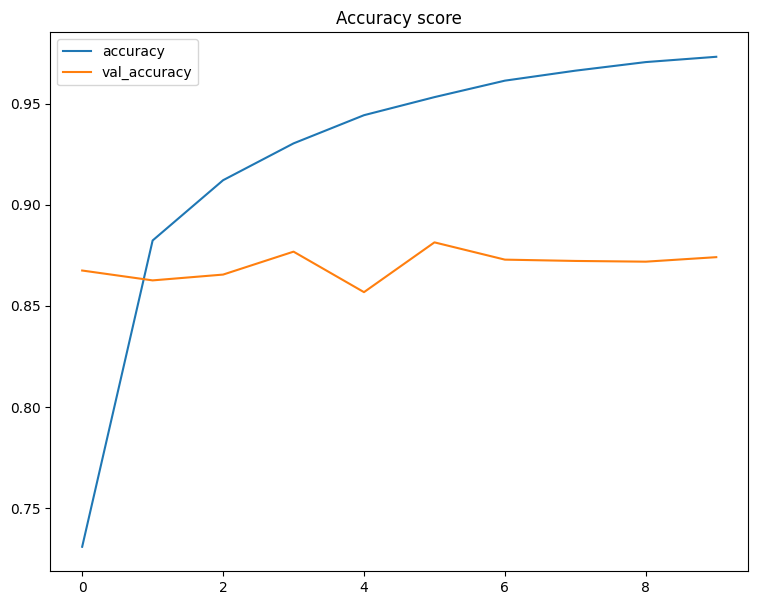

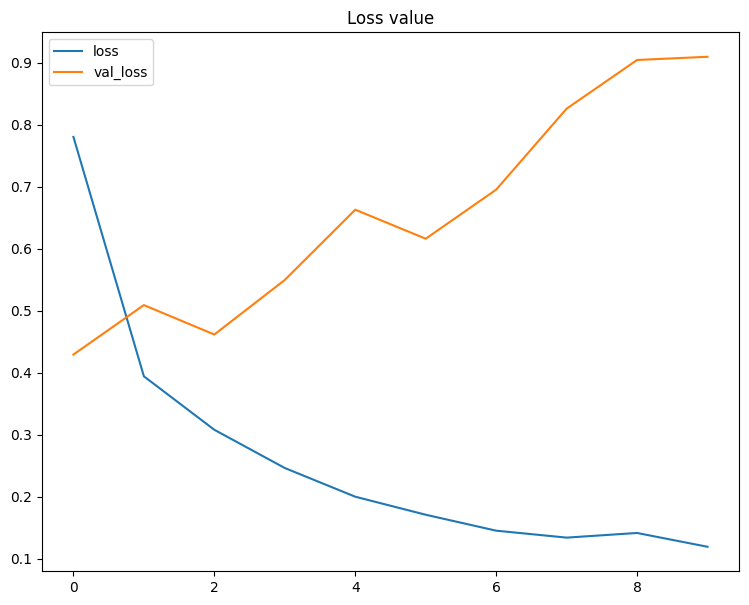

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Accuracy score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(9,7))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

## Load Weights with Best val Accuracy

In [ ]:
model.load_weights('weights.h5')
model.save('model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Demo

In [ ]:
def modelDemo(news_text):

  #News Labels
  # labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']

  with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

  test_seq = pad_sequences(tokenizer.texts_to_sequences(news_text), maxlen=maxlen)

  predict = model.predict(test_seq)
  label = le.inverse_transform([np.argmax(predict)])[0]
  print(label)

  # test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]

  # for news, label in zip(news_text, test_preds):
  #     # print('{} - {}'.format(news, label))
  #     print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))


In [ ]:
modelDemo(['cara memperbaiki motor'])

In [ ]:
modelDemo(['kepala tiba-tiba pusing'])

In [ ]:
modelDemo(['pemain bola ini mendapatkan gaji 2 kali lipat pekerjaan pilot'])

In [ ]:
modelDemo(['cara meredahkan sakit kepala'])

In [ ]:
modelDemo(['cara mengganti baterai hp'])

In [ ]:
modelDemo(['bank mandiri mendapatkan suntikan dana sebesar 1 Triliun'])

## Model Evaluation

In [ ]:
labels = le.classes_
print(labels)

['finance' 'food' 'hot' 'inet' 'oto' 'sport' 'travel']


### Confusion Matrix

436/436 [==============================] - 3s 4ms/step


<Figure size 640x480 with 0 Axes>

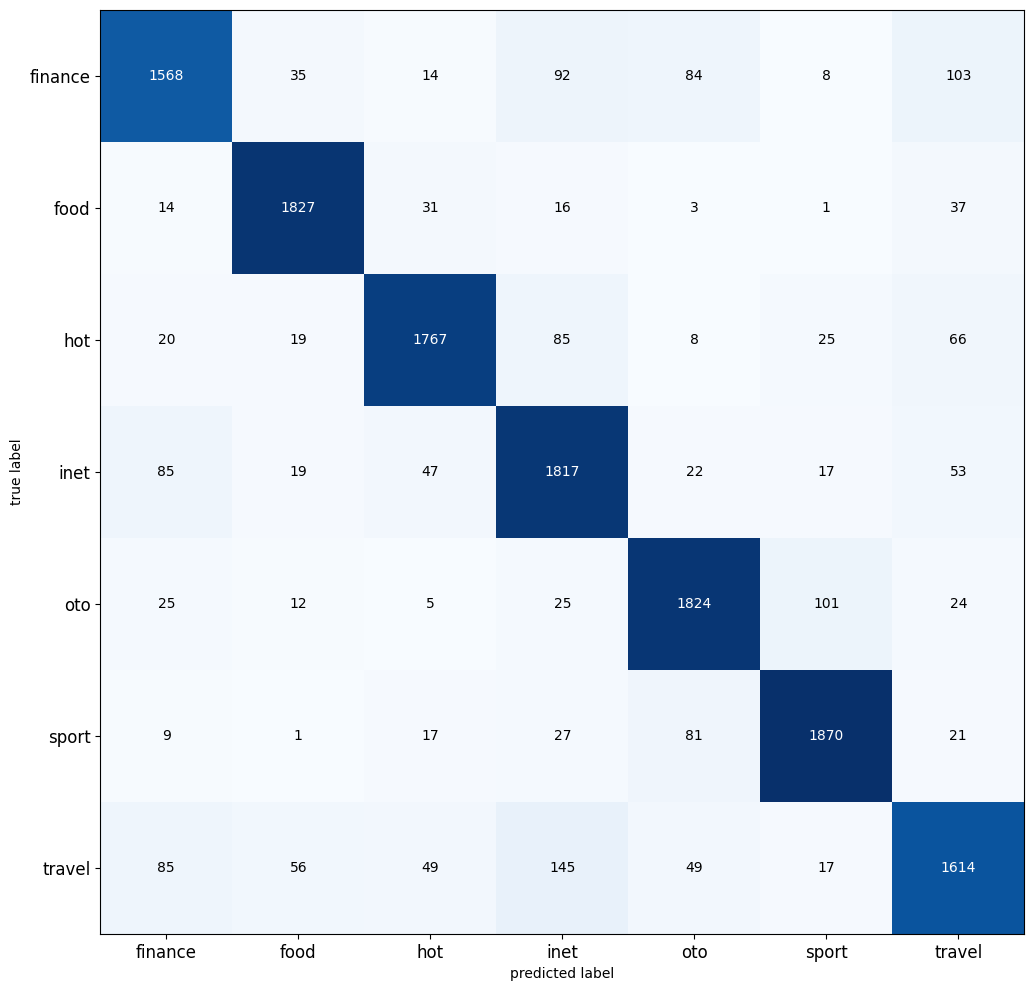

In [ ]:
# labels = ['finance', 'food', 'hot', 'inet', 'oto', 'sport', 'travel']
preds = [np.argmax(i) for i in model.predict(X_val)]
cm  = confusion_matrix(y_val, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(7), labels, fontsize=12)
plt.yticks(range(7), labels, fontsize=12)
plt.show()

### Recall, Precision and Accuracy

In [ ]:
print("Recall of the model is {:.3f}".format(recall_score(y_val, preds, average='micro')))
print("Precision of the model is {:f}".format(precision_score(y_val, preds, average='micro')))
print("Accuracy of the model is {:f}".format(accuracy_score(y_val, preds)))
print("F1 score of the modell is {:f}".format(f1_score(y_val, preds, average='micro')))

Recall of the model is 0.881
Precision of the model is 0.881420
Accuracy of the model is 0.881420
F1 score of the modell is 0.881420
